In [1]:
import numpy as np
import os
import argparse
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from astropy.io import ascii
import pandas as pd
from pandas.compat import StringIO
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
from sedpy import observate

/home/idies/miniconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/idies/miniconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


### Define a function that returns a flux (in units of maggies) given an AB magnitude

In [2]:
def flux(mag):
    flux = 10.**(mag/(-2.5))
    return flux

### Define a function that returns inverse variance (in units of maggies) given a magnitude and an uncertainty on that magnitude

In [3]:
# this function assumes the magnitude value is on the AB system
def ivar(mag, unc):
    flux = 10.**(mag/(-2.5))
    func = flux / 1.086 * unc
    ivar = 1 / func**2
    return ivar

# Read umeh table into pandas dataframe

In [4]:
umeh = pd.read_csv('umeh_table.dat', sep=r'\s{1,}', engine='python', index_col=0)

In [ ]:
umeh.head()

### Convert maggies into flux

In [31]:
umeh_flux = pd.DataFrame({'fuv_f':flux(umeh.fuv_mag), 'fuv_ivar':ivar(umeh.fuv_mag, umeh.fuv_unc),
                          'nuv_f':flux(umeh.nuv_mag), 'nuv_ivar':ivar(umeh.nuv_mag, umeh.nuv_unc),
                          'u_f':flux(umeh.u_mag), 'u_ivar':ivar(umeh.u_mag, umeh.u_unc),
                          'g_f':flux(umeh.g_mag), 'g_ivar':ivar(umeh.g_mag, umeh.g_unc),
                          'r_f':flux(umeh.r_mag), 'r_ivar':ivar(umeh.r_mag, umeh.r_unc),
                          'i_f':flux(umeh.i_mag), 'i_ivar':ivar(umeh.i_mag, umeh.i_unc),
                          'z_f':flux(umeh.z_mag), 'z_ivar':ivar(umeh.z_mag, umeh.z_unc),
                          'w1_f':flux(umeh.w1_mag)*306.681/3631, 'w1_ivar':ivar(umeh.w1_mag, umeh.w1_unc)*(306.681/3631)**-2,
                          'w2_f':flux(umeh.w2_mag)*170.663/3631, 'w2_ivar':ivar(umeh.w2_mag, umeh.w2_unc)*(170.663/3631)**-2,
                          'w3_f':flux(umeh.w3_mag)*29.0448/3631, 'w3_ivar':ivar(umeh.w3_mag, umeh.w3_unc)*(29.0448/3631)**-2,
                          'w4_f':flux(umeh.w4_mag)*8.2839/3631, 'w4_ivar':ivar(umeh.w4_mag, umeh.w4_unc)*(8.2839/3631)**-2}, index=umeh.index.values)

In [7]:
umeh_flux.head()

,fuv_f,fuv_ivar,nuv_f,nuv_ivar,u_f,u_ivar,g_f,g_ivar,r_f,r_ivar,...,z_f,z_ivar,w1_f,w1_ivar,w2_f,w2_ivar,w3_f,w3_ivar,w4_f,w4_ivar
J0826,1.066596e-09,4.205914e+19,6.963058e-09,1.599302e+19,1.391874e-08,5.266254e+18,1.691999e-08,3.404664e+19,2.210039e-08,1.231980e+19,...,2.876074e-08,6.738201e+17,5.870304e-08,6.469679e+17,4.108782e-08,4.014914e+14,2.029748e-07,7.526801e+10,8.802552e-07,1.078751e+08
J0901,1.533204e-09,3.542956e+19,9.019864e-09,9.530824e+18,1.558834e-08,5.771167e+18,1.926637e-08,2.206466e+19,2.951209e-08,1.119114e+19,...,3.735941e-08,7.309738e+17,6.758660e-08,5.334492e+17,4.648503e-08,2.943742e+14,1.707034e-07,6.162429e+10,7.444038e-07,8.940758e+07
J0905,3.445085e-10,5.374310e+19,4.293387e-09,1.838043e+19,1.085425e-08,6.256618e+18,1.460158e-08,2.822303e+19,1.466898e-08,2.141015e+19,...,2.165708e-08,4.988190e+17,4.001848e-08,1.010208e+18,2.665098e-08,5.731650e+14,1.577038e-07,1.101142e+11,6.555542e-07,1.535536e+08
J0944,9.358365e-10,1.383409e+19,3.197422e-09,1.108816e+19,7.634841e-09,8.426893e+18,1.201158e-08,3.633098e+19,1.914256e-08,1.430465e+19,...,2.370282e-08,7.473222e+17,5.304697e-08,5.345919e+17,3.960164e-08,2.730678e+14,2.494837e-07,6.012886e+10,9.183508e-07,8.898721e+07
J1107,6.798295e-10,2.036353e+19,2.759307e-09,1.432165e+19,1.027070e-08,7.350729e+18,1.560271e-08,2.866639e+19,2.357219e-08,1.473999e+19,...,3.299134e-08,1.127551e+18,4.923349e-08,6.206151e+17,5.027049e-08,3.173291e+14,3.921409e-07,7.479794e+10,1.139223e-06,1.125517e+08


In [8]:
umeh_flux.iloc[:,::2]

,fuv_f,nuv_f,u_f,g_f,r_f,i_f,z_f,w1_f,w2_f,w3_f,w4_f
J0826,1.066596e-09,6.963058e-09,1.391874e-08,1.691999e-08,2.210039e-08,2.810606e-08,2.876074e-08,5.870304e-08,4.108782e-08,2.029748e-07,8.802552e-07
J0901,1.533204e-09,9.019864e-09,1.558834e-08,1.926637e-08,2.951209e-08,3.317416e-08,3.735941e-08,6.758660e-08,4.648503e-08,1.707034e-07,7.444038e-07
J0905,3.445085e-10,4.293387e-09,1.085425e-08,1.460158e-08,1.466898e-08,2.276145e-08,2.165708e-08,4.001848e-08,2.665098e-08,1.577038e-07,6.555542e-07
J0944,9.358365e-10,3.197422e-09,7.634841e-09,1.201158e-08,1.914256e-08,2.333458e-08,2.370282e-08,5.304697e-08,3.960164e-08,2.494837e-07,9.183508e-07
J1107,6.798295e-10,2.759307e-09,1.027070e-08,1.560271e-08,2.357219e-08,2.789973e-08,3.299134e-08,4.923349e-08,5.027049e-08,3.921409e-07,1.139223e-06
J1219,8.379151e-10,2.652162e-09,8.717661e-09,1.550244e-08,3.059145e-08,3.872576e-08,4.630203e-08,8.276765e-08,6.282220e-08,4.432433e-07,1.716361e-06
J1341,1.586354e-09,8.798325e-09,1.984266e-08,2.601357e-08,2.841842e-08,3.268888e-08,3.000544e-08,5.418270e-08,3.823958e-08,2.988423e-07,1.250284e-06
J1506,2.769491e-09,1.366470e-08,1.921321e-08,2.236660e-08,2.802851e-08,3.467369e-08,3.637475e-08,6.647535e-08,5.512050e-08,3.261686e-07,1.932896e-06
J1558,3.056328e-09,9.935735e-09,1.804679e-08,2.342071e-08,3.837072e-08,4.242287e-08,5.062908e-08,7.322521e-08,6.913741e-08,4.159510e-07,8.207457e-07
J1613,4.172535e-10,3.535086e-09,7.950602e-09,1.251988e-08,2.664404e-08,3.338874e-08,4.269726e-08,9.670760e-08,8.824968e-08,6.598453e-07,2.745419e-06


In [9]:
wave = np.array([0.1528, 0.2271, 0.3543, 0.477, 0.6231, 0.7625, 0.9134, 3.368, 4.618, 12.082, 22.194])
templates = ['Composite1', 'Composite2', 'Composite3', 'AGN1', 'AGN2', 'AGN3', 'AGN4', 'SFG1', 'SFG2', 'SFG3', 
             'IR_COLOR1', 'IR_COLOR2', 'IR_COLOR3', 'IR_COLOR4', 'IR_COLOR5', 'IR_COLOR6', 'IR_COLOR7', 'IR_COLOR8']
gals = ['J0826', 'J0901', 'J0905', 'J0944', 'J1107', 'J1219', 'J1341', 'J1506', 'J1558', 'J1613', 'J2116', 'J2140']

# Read templates

In [10]:
#Read the template into a data frame. Name columns something convenient.
def read_template(name):
    #temps_path = 'C:/Users/Chris/Documents/GitHub/bates_galaxies_lab/hst/Comprehensive_library/'
    temps_path = 'kirkpatrick/'
    temp = pd.read_csv(temps_path+name+'.txt',
                       names=['rest_wavelength','luminosity','DLnu'],
                       skiprows=[0, 1, 2, 3],
                       sep=r'\s{1,}',
                       engine='python')
    return temp

# Function to match a target wavelength's position.
def mask_wave(temp_wavel, target_wave):
    return np.abs(temp_wavel-target_wave) == np.amin(np.abs(temp_wavel-target_wave))

Function to scale a template using the W1 flux as reference - inputs are galaxy name, and name of template. Plots result, returns scaling factor for luminosity of template.

In [29]:
def fit_template(gal_name, template_name):
    z = umeh.loc[gal_name, 'z']
    template = read_template(template_name)
    
    z_temp_wavel = template.rest_wavelength*(1+z)
    gal_fluxes = umeh_flux.loc[gal_name,::2].values
    W1_wavelength = wave[7]
    # Figure out where the template lines up with W1
    mask = mask_wave(z_temp_wavel, W1_wavelength)
    #print('maskcheck---',sum(mask),template.luminosity[mask].values[0])
    # Scale template to match value at W1
    factor = gal_fluxes[7]/float(template.luminosity[mask].values[0])
    luminosity = template.luminosity*factor # Scale
    
    wave_aa = np.array(z_temp_wavel[0:-1]) * 1e4
    flux = np.array(luminosity[0:-1])
    fnu = flux * 3631. * 1e-23
    flambda = fnu * 2.998e18 / (wave_aa)**2

    filternames = ['wise_w{}'.format(n) for n in ['1', '2', '3', '4']]
    wise_filters = observate.load_filters(filternames)
    model_mags = observate.getSED(wave_aa, flambda, filterlist=wise_filters)
    wave_eff = [f.wave_effective for f in wise_filters]
    model_phot = 10.**(model_mags/(-2.5))
    
    gal_unc = np.sqrt(umeh_flux.iloc[:,1::2].loc[gal_name].values**-1)
    
    # Plot
    plot = True

    if plot:
        title = gal_name+'-'+template_name
        fig = plt.figure(figsize=(17,8))
        ax = fig.add_subplot(1,1,1)
        #g = sns.lineplot(x=z_temp_wavel, y=luminosity, ax=ax, color='green', alpha=0.8)
        ax.plot(z_temp_wavel, luminosity, color='green')
        #h = sns.scatterplot(x=wave, y=gal_fluxes, ax=ax)
        ax.scatter(wave,gal_fluxes, color='blue')
        ax.errorbar(wave, gal_fluxes, yerr=gal_unc, color='blue')
        ax.scatter(np.array(wave_eff)/1e4, model_phot, color='red')
        ax.set_ylim([1e-10,1e-3])
        ax.set_xlim([0.1, 1000.])
        ax.loglog()
        ax.set_title(title)
        plt.ioff()
        #plt.savefig(title+'.png')
        #plt.clf()
        #plt.close()
    return(factor)

In [36]:
# Evaluate
def chi_squared(gal_name, template, factor):
    # Set up variables
    z = umeh.loc[gal_name, 'z']
    template = read_template(template)
    z_temp_wavel = template.rest_wavelength*(1+z)
    # Fetch useful quantities from table(s)
    gal_fluxes = umeh_flux.iloc[:,::2].loc[gal_name].values
    gal_unc = np.sqrt(umeh_flux.iloc[:,1::2].loc[gal_name].values**-1)
    target_wavels = wave[7:]
    
    
    luminosity = template.luminosity*factor
    
    wave_aa = np.array(z_temp_wavel[0:-1]) * 1e4
    flux = np.array(luminosity[0:-1])
    fnu = flux * 3631. * 1e-23
    flambda = fnu * 2.998e18 / (wave_aa)**2

    filternames = ['wise_w{}'.format(n) for n in ['1', '2', '3', '4']]
    wise_filters = observate.load_filters(filternames)
    model_mags = observate.getSED(wave_aa, flambda, filterlist=wise_filters)
    wave_eff = [f.wave_effective for f in wise_filters]
    model_phot = 10.**(model_mags/(-2.5))
    
    
    # Chi^2 Calculation
    masks = np.array([mask_wave(z_temp_wavel, current_wave) for current_wave in target_wavels])
    #print(gal_fluxes)
    #print(model_phot)
    #print(gal_unc)
    chi = np.sum(np.array([((gal_fluxes[i+7] - model_phot[i])/gal_unc[i+7])**2 for i in range(4)]))/4
    #print(template, chi)
    
    return chi

4.709867838054117e-31


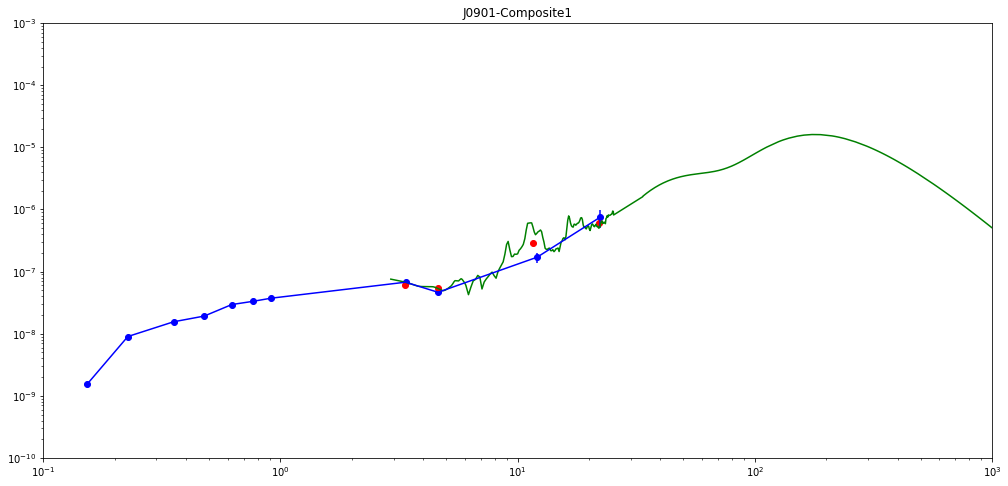

In [32]:
factor1 = fit_template('J0901', 'Composite1')
print(factor1)

In [40]:
with PdfPages('sed_fitting.pdf') as pdf:
    for gal in umeh.index.values:
        print("---Fitting ", gal)
        chis = []
        for tem in templates:
            new_fac = fit_template(gal, tem)
            new_chi = chi_squared(gal, tem, new_fac)
            print(new_chi.round(decimals=1), tem)
            chis.append(new_chi)
            
            plt.text(.5, .05, str(new_chi.round(decimals=1)), ha='center')
            pdf.savefig(bbox_inches="tight")
            plt.close('all')
        bestchi_pos = chis.index(min(chis))
        print("Galaxy - ", gal, " - lowest chi template: ", templates[bestchi_pos])

---Fitting  J0826
51.2 Composite1
71.7 Composite2
151.5 Composite3
172.5 AGN1
241.5 AGN2
603.7 AGN3
443.1 AGN4
64.9 SFG1
50.8 SFG2
77.1 SFG3
70.2 IR_COLOR1
47.9 IR_COLOR2
230.7 IR_COLOR3
111.6 IR_COLOR4
236.8 IR_COLOR5
312.2 IR_COLOR6
257.6 IR_COLOR7
298.0 IR_COLOR8
Galaxy -  J0826  - lowest chi template:  IR_COLOR2
---Fitting  J0901
11.7 Composite1
46.2 Composite2
264.7 Composite3
135.9 AGN1
205.2 AGN2
217.7 AGN3
349.3 AGN4
10.9 SFG1
44.3 SFG2
54.6 SFG3
37.0 IR_COLOR1
17.1 IR_COLOR2
138.9 IR_COLOR3
75.9 IR_COLOR4
255.3 IR_COLOR5
326.6 IR_COLOR6
197.6 IR_COLOR7
275.5 IR_COLOR8
Galaxy -  J0901  - lowest chi template:  SFG1
---Fitting  J0905
131.4 Composite1
141.9 Composite2
164.9 Composite3
220.3 AGN1
220.1 AGN2
652.8 AGN3
399.2 AGN4
125.8 SFG1
122.3 SFG2
133.8 SFG3
122.7 IR_COLOR1
125.8 IR_COLOR2
262.9 IR_COLOR3
156.9 IR_COLOR4
222.2 IR_COLOR5
231.4 IR_COLOR6
256.0 IR_COLOR7
294.9 IR_COLOR8
Galaxy -  J0905  - lowest chi template:  SFG2
---Fitting  J0944
9.3 Composite1
13.9 Composite2
9